In [21]:
#!/usr/bin/python3 
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [22]:
root_path = '/root/DIVP_project/'
image_path_vivid = "project01/proj01-images/lena_std.bmp"
image_path_gray = "project01/proj01-images/Fig2.22(b).jpg"
image_path_tif = "project01/proj01-images/Fig0308(a)(fractured_spine).tif"

In [23]:
image_gray = Image.open(root_path + image_path_gray)
print(type(image_gray))
print(image_gray.size)
print(image_gray.mode)

<class 'PIL.JpegImagePlugin.JpegImageFile'>
(256, 256)
L


参考method： [PIL resize](https://pillow.readthedocs.io/en/stable/reference/Image.html#PIL.Image.Image.resize)
```shell
class PIL.Image.Resampling(value, names=<not given>, *values, module=None, qualname=None, type=None, start=1, boundary=None)[source]
BICUBIC = 3
BILINEAR = 2
BOX = 4
HAMMING = 5
LANCZOS = 1
NEAREST = 0
```


In [ ]:
# 自己实现最近邻插值，根据图像大小比例插值
def nearest_neighbor_interpolation(image, scale):
    width, height = image.size
    new_width = int(width * scale)
    new_height = int(height * scale)
    new_image = Image.new('L', (new_width, new_height))
    for i in range(new_width):
        for j in range(new_height):
            x = int(i / scale)
            y = int(j / scale)
            new_image.putpixel((i, j), image.getpixel((x, y)))
    return new_image

In [24]:
# resize image to half
image_gray_half = image_gray.resize((int(image_gray.size[0]/2), int(image_gray.size[1]/2)))
# 对image_gray_half 使用线性插值 得到size*2的图像
image_gray_half_linear = image_gray_half.resize((int(image_gray_half.size[0]*2), int(image_gray_half.size[1]*2)), resample=Image.Resampling.BILINEAR)
# 对image_gray_half 使用双线性插值 得到size*2的图像
image_gray_half_bilinear = image_gray_half.resize((int(image_gray_half.size[0]*2), int(image_gray_half.size[1]*2)), resample=Image.Resampling.BICUBIC)
# 最近邻插值
image_gray_half_nearest = image_gray_half.resize((int(image_gray_half.size[0]*2), int(image_gray_half.size[1]*2)), resample=Image.Resampling.NEAREST)

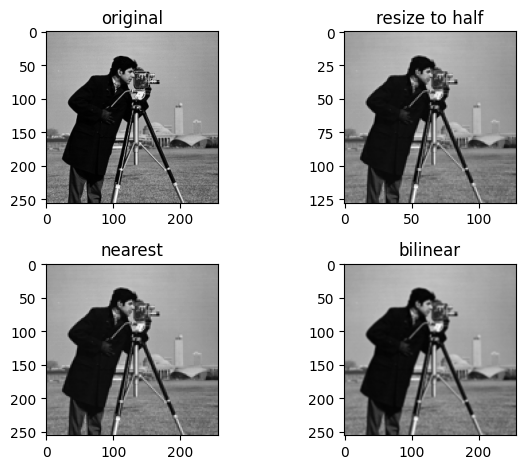

In [29]:
plt.figure()
plt.subplot(221)
plt.imshow(image_gray, cmap='gray')
plt.title('original')
plt.subplot(222)
plt.imshow(image_gray_half, cmap='gray')
plt.title('resize to half')
plt.subplot(223)
plt.imshow(image_gray_half_nearest, cmap='gray')
plt.title('nearest')
plt.subplot(224)
plt.imshow(image_gray_half_linear, cmap='gray')
plt.title('bilinear')
plt.tight_layout()
plt.show()

In [28]:
# # 简单使用show方法 可视化
# image_gray.show()
# print("original")
# image_gray_half.show()
# print("resize to half")
# image_gray_half_nearest.show()
# print("nearest")
# image_gray_half_bilinear.show()
# print("blinear")
# image_gray_half_linear.show()